# **Data Description**
**SeriousDlqin2yrs:** Person experienced 90 days past due delinquency or worse

**RevolvingUtilizationOfUnsecuredLines:** Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits

**age** Age of borrower in years

**NumberOfTime30-59DaysPastDueNotWorse:** Number of times borrower has been 30-59 days past due but no worse in the last 2 years.

**DebtRatio:** Monthly debt payments, alimony,living costs divided by monthy gross income

**MonthlyIncome:** Monthly income

**NumberOfOpenCreditLinesAndLoans:** Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)

**NumberOfTimes90DaysLate:** Number of times borrower has been 90 days or more past due.

**NumberRealEstateLoansOrLines:** Number of mortgage and real estate loans including home equity lines of credit

**NumberOfTime60-89DaysPastDueNotWorse:** Number of times borrower has been 60-89 days past due but no worse in the last 2 years.

**NumberOfDependents:** Number of dependents in family excluding themselves (spouse, children etc.)

## The purpose here is to predict the probability of a person to default. The target attribute is SeriousDlqin2yrs. 
### The attributes here are discreet values of 0 & 1 as we will see below. Predicting the probability rather than the binary value is due to the fact lenders will need to use the probability to assess and make decision.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as se
from sklearn.model_selection import train_test_split
from __future__ import print_function
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.pipeline import make_pipeline
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from IPython.display import display, Image, SVG, Math, YouTubeVideo
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(__doc__)


from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

data = pd.read_csv('Dataset/creditcards.csv')
data = data.drop('Unnamed: 0', axis=1)
data.head()

Automatically created module for IPython interactive environment


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


## 1. Exploratory Data Analysis
    - Size and Shape of data.
    - How many missing values in our columns.
    - How many instences do we have per class.
    - Univariate Analysis.
    - Correlation Study.

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(7)
memory usage: 12.6 MB


In [3]:
# Let's see which class has more of the missing values

subsample = data[['NumberOfDependents', 'MonthlyIncome', 'SeriousDlqin2yrs']]
subsample0 = subsample.loc[subsample['SeriousDlqin2yrs'] == 0]
subsample1 = subsample.loc[subsample['SeriousDlqin2yrs'] == 1]

print('Total missing values\n\n', subsample.isnull().sum(), '\n\n')
print('Report counts of missing values from each class')
print('\n Class 0 \n \n Number of missing values for class 0:\n', subsample0.isnull().sum())
print('\n Class 1 \n \n Number of missing values for class 1:\n', subsample1.isnull().sum())

Total missing values

 NumberOfDependents     3924
MonthlyIncome         29731
SeriousDlqin2yrs          0
dtype: int64 


Report counts of missing values from each class

 Class 0 
 
 Number of missing values for class 0:
 NumberOfDependents     3745
MonthlyIncome         28062
SeriousDlqin2yrs          0
dtype: int64

 Class 1 
 
 Number of missing values for class 1:
 NumberOfDependents     179
MonthlyIncome         1669
SeriousDlqin2yrs         0
dtype: int64


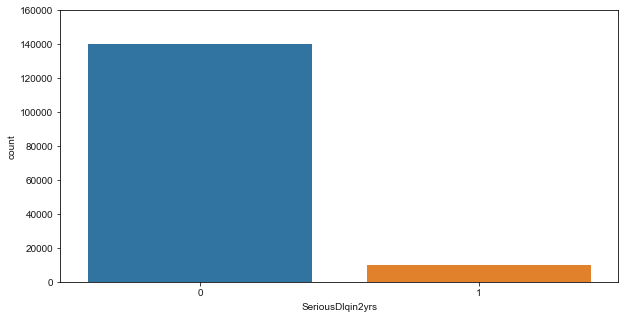

In [4]:
plt.figure(figsize=(10,8))
se.countplot("SeriousDlqin2yrs", data=data)
ax = se.countplot(x = data.SeriousDlqin2yrs)
se.set(font_scale=1.5)
fig = plt.gcf()
fig.set_size_inches(10,5)
ax.set_ylim(top=160000)

plt.show()

In [5]:
#Let's count the number of samples per class

class_0 = data.SeriousDlqin2yrs.value_counts()[0]
class_1 = data.SeriousDlqin2yrs.value_counts()[1]

print('Total Number of Class 0: ', class_0)
print('Total Number of Class 1: ', class_1)

Total Number of Class 0:  139974
Total Number of Class 1:  10026


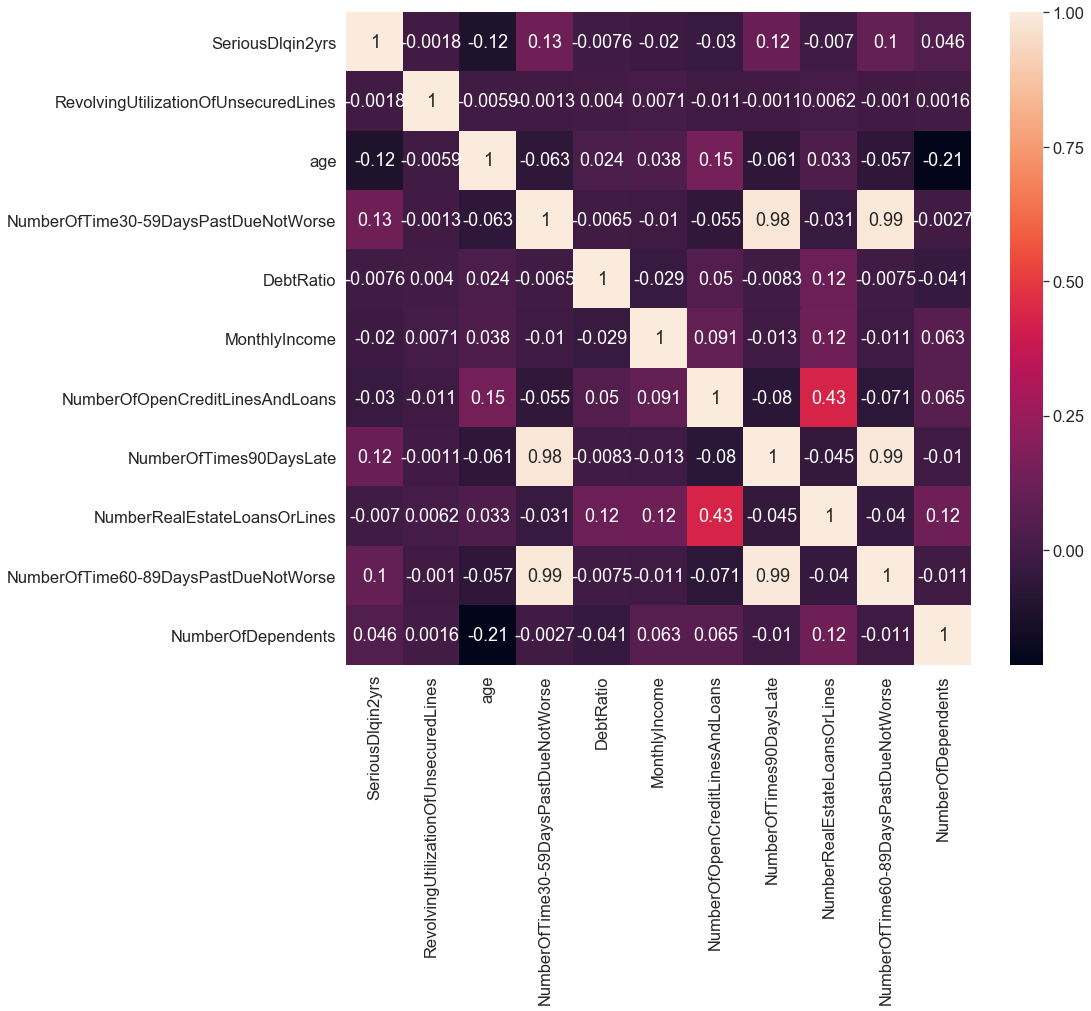

In [6]:
#Test correlation between feautres
#Correlation heatmap
corr = data.corr()
plt.figure(figsize=(14,12))
se.heatmap(corr, annot=True)

**It is noticeable that there is a slight correlation between the *SeriousDlqin2yrs* and *NumberOfTime30-59DaysPastDueNotWorse* AND *NumberOfTimes90DaysLate* AND *NumberOfTime60-89DaysPastDueNotWorse*.**

*This correlation can be troublesome for the algorithm, for now we will proceed with a simple treatment by elemnating the the features and keep only one and we will test the performance of the model on the sample that include all of the feautres and the sample that includes only one feautre.*

This imbalance in the samples from each class is something that we have to work on. In real life the ratio somwhat similar and in our modeling we need to have the same representation without compromising the performance of the model. In other words our model have to be decently sensitive to each class and precise in the detection.

## Issues and fixes:
    - Missing values.
    - Highly correlated attributes.
    - imbalance in the class instances.

Missing values:
    - Replace with ZERO.
    - Replace with Mean value.
    - Replace with Mean+std.
    - Replace with apa2 pon boleh

In [7]:
Image(url='https://i.imgflip.com/2hp6gk.jpg')


In [8]:
# Just to make things fast let's use the mean
data = data.fillna(data.mean())

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           150000 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      150000 non-null float64
dtypes: float64(4), int64(7)
memory usage: 12.6 MB


### One of the ways to get rid of the correlation is buy excluding few attributes.

### We cannot really do something about the inbalance in this dataset for now, therefore, we have to be mindful of the inbalance and observe the peformance of the model.

In [10]:
# Here we decided to only keep NumberOfTimes90DaysLate
# Let this be our main sample, later on we may make up few sub-sample for experimentations.

X = data [['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio', 'MonthlyIncome',
          'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
          'NumberRealEstateLoansOrLines',
          'NumberOfDependents']]

y = data [['SeriousDlqin2yrs']]

# sample X splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=49)

## Modelling Plan:
- Train our main model.
- Experiment with secondary model.
- Evaluate each model with Confusion matrix and classification report.
- choose primary model.
- Persist primary model.

In [11]:
# Main model
GNB_normal = GaussianNB()
GNB_normal.fit(X_train, y_train)

pred_train_normal = GNB_normal.predict(X_train)
pred_test_normal = GNB_normal.predict(X_test)

# Show prediction accuracies in scaled and unscaled data.
print('\nPrediction accuracy for the training set')
print('{:.2%}\n'.format(metrics.accuracy_score(y_train, pred_train_normal)))

print('\nPrediction accuracy for the testing set')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test_normal)))


Prediction accuracy for the training set
92.96%


Prediction accuracy for the testing set
92.92%



In [12]:
labels = ['Non-deafult', 'default']

print('Training set Classification Report')
print('\n \n', classification_report(y_train, pred_train_normal, target_names=labels))

print('Testing set Classification Report')
print('\n \n', classification_report(y_test, pred_test_normal, target_names=labels))

Training set Classification Report

 
              precision    recall  f1-score   support

Non-deafult       0.94      0.99      0.96     97981
    default       0.30      0.04      0.07      7019

avg / total       0.89      0.93      0.90    105000

Testing set Classification Report

 
              precision    recall  f1-score   support

Non-deafult       0.94      0.99      0.96     41993
    default       0.30      0.05      0.08      3007

avg / total       0.89      0.93      0.90     45000



Confusion matrix, without normalization
[[41675   318]
 [ 2870   137]]
Normalized confusion matrix
[[ 0.99  0.01]
 [ 0.95  0.05]]


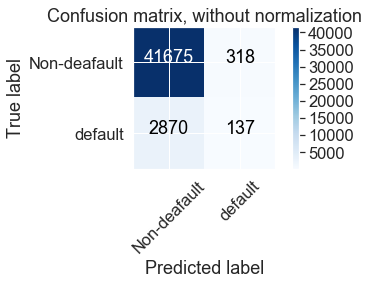

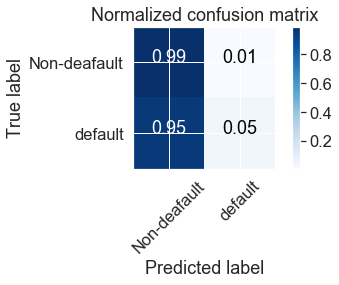

In [13]:
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y_pred = pred_test_normal

class_names = ['Non-deafault', 'default']

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# Secondary Model

In [14]:
logreg_normal = LogisticRegression()
logreg_normal.fit(X_train, y_train)

pred_train_normal = logreg_normal.predict(X_train)
pred_test_normal = logreg_normal.predict(X_test)

# Show prediction accuracies in scaled and unscaled data.
print('\nPrediction accuracy for the training set')
print('{:.2%}\n'.format(metrics.accuracy_score(y_train, pred_train_normal)))

print('\nPrediction accuracy for the testing set')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test_normal)))


Prediction accuracy for the training set
93.31%


Prediction accuracy for the testing set
93.34%



In [15]:
print('Training set Classification Report')
print('\n \n', classification_report(y_train, pred_train_normal, target_names=labels))

print('Testing set Classification Report')
print('\n \n', classification_report(y_test, pred_test_normal, target_names=labels))

Training set Classification Report

 
              precision    recall  f1-score   support

Non-deafult       0.93      1.00      0.97     97981
    default       0.48      0.01      0.02      7019

avg / total       0.90      0.93      0.90    105000

Testing set Classification Report

 
              precision    recall  f1-score   support

Non-deafult       0.93      1.00      0.97     41993
    default       0.58      0.01      0.03      3007

avg / total       0.91      0.93      0.90     45000



### Let's not forget the following math:
1. Class 0 is 93.32% of the dataset.
2. Class 1 is 6.68% of the dataset.

### In English, we are looking for model good enough to be 7% sensitive towards class1.
#### That model is the GaussianNB. Let's persist this model.

In [16]:
from sklearn.externals import joblib

# Save the model
model_filename = 'credit-GNB-v1.0.pkl'
print("Saving model to {}...".format(model_filename))
joblib.dump(GNB_normal, model_filename)

Saving model to credit-GNB-v1.0.pkl...


['credit-GNB-v1.0.pkl']

# Deploying into Flask API

# test your API

In [17]:
data.head(3)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0


In [18]:
X_train[0:1]

,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfDependents
61127,0.316872,49,0.305376,8500.0,6,0,2,2.0


In [21]:
import requests
response = requests.get('http://127.0.0.1:5000/predict?RevolvingUtilizationOfUnsecuredLines=0.766127&age=45&DebtRatio=0.305376&MonthlyIncome=8500.0&NumberOfOpenCreditLinesAndLoans=6&NumberOfTimes90DaysLate=0&NumberRealEstateLoansOrLines=2&NumberOfDependents=2.0')
print(response.text)


{
  "label": "non-default", 
  "status": "complete"
}



In [1]:
import requests
response = requests.get('http://127.0.0.1:5000/predict?RevolvingUtilizationOfUnsecuredLines=0.766127&age=45&DebtRatio=0.305376&MonthlyIncome=8500.0&NumberOfOpenCreditLinesAndLoans=6&NumberOfTimes90DaysLate=0&NumberRealEstateLoansOrLines=2&NumberOfDependents=2.0')
print(response.text)



{
  "label": "non-default", 
  "status": "complete"
}

